PART 1

1. Complete Text Preprocessing Pipeline
Using the movie reviews dataset above, perform a comprehensive text preprocessing
pipeline:
Part 0: Load the dataset and sample the first 1000 reviews for easy processing.

In [1]:
pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install huggingface_hub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk scikit-learn pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install contractions


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet
import contractions

nltk.download('punkt')
# For tokenization
nltk.download('punkt_tab')
nltk.download('stopwords')
# For stopword removal
nltk.download('wordnet')
# For lemmatization
nltk.download('omw-1.4')
# WordNet multilingual data
nltk.download('averaged_perceptron_tagger') # For POS tagging
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /home2/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home2/student/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home2/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home2/student/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home2/student/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home2/student/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home2/student/nltk_data...
[nltk_data]   Package averaged_percep

True

In [3]:
import pandas as pd
import re
import contractions
import nltk
from nltk.corpus import stopwords

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


documents = list(df['text'])






vector = CountVectorizer()


dtm_sparse = vector.fit_transform(documents)

vocabulary = vector.get_feature_names_out()

dtm_dense = dtm_sparse.toarray()

print("Vocabulary:", vocabulary)
print("\nDocument-Term Matrix (Dense):\n", dtm_dense)



Vocabulary: ['aaaarrgh' 'aames' 'aankhen' ... 'zuniga' 'zunigas' 'zx']

Document-Term Matrix (Dense):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
from sklearn.feature_extraction.text import CountVectorizer


documents = list(df['text'])






vector = CountVectorizer(ngram_range=(2, 2))


dtm_sparse = vector.fit_transform(documents)

vocabulary = vector.get_feature_names_out()

dtm_dense = dtm_sparse.toarray()

print("Vocabulary:", vocabulary)
print("\nDocument-Term Matrix (Dense):\n", dtm_dense)

Vocabulary: ['aaaarrgh former' 'aankhen adapted' 'aankhen which' ... 'zuniga who'
 'zunigas first' 'zx the']

Document-Term Matrix (Dense):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer


documents = list(df['text'])






vector = CountVectorizer(ngram_range=(3, 3))


dtm_sparse = vector.fit_transform(documents)

vocabulary = vector.get_feature_names_out()

dtm_dense = dtm_sparse.toarray()

print("Vocabulary:", vocabulary)
print("\nDocument-Term Matrix (Dense):\n", dtm_dense)

Vocabulary: ['aaaarrgh former bodyguard' 'aankhen adapted from' 'aankhen which was'
 ... 'zuniga who yeah' 'zunigas first horror' 'zx the acting']

Document-Term Matrix (Dense):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Part A: Basic Preprocessing

1. Lowercase conversion - Convert all text to lowercase
2. Contraction expansion - Expand contractions (I’m → I am, It’s → It is,
etc.)3. Punctuation & special character removal - Remove all punctuation marks
and special characters
4. Tokenization - Split text into individual words/tokens
5. Stopword removal - Remove English stopwords using NLTK

In [4]:


splits = {'train': 'plain_text/train-00000-of-00001.parquet',
'test': 'plain_text/test-00000-of-00001.parquet',
'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])

In [5]:
df= df.iloc[0:1000 , :]

In [6]:
df['text'] = df['text'].str.lower()

In [7]:
ls = list(df['text'])
for i in range(len(ls)):
    ls[i] = contractions.fix(ls[i])


df['text'] = ls


# df = sorted(df , key=lambda x[1] : len(x[1]))

In [8]:
ls = list(df['text'])
for i in range(len(ls)):
    ls[i] = re.sub(r'[^a-z\s]','',ls[i])


df['text'] = ls


In [9]:


ls = list(df['text'])
for i in range(len(ls)):
    ls[i] = word_tokenize(ls[i])


df['text'] = ls


NameError: name 'word_tokenize' is not defined

In [ ]:
nltk.download('stopwords')

# Access English stop words
english_words = set(stopwords.words('english'))


ls = list(df['text'])
for i in range(len(ls)):
    filtered_tokens = [word for word in ls[i] if word not in english_words]
    ls[i] = filtered_tokens


df['text'] = ls

Part B: Advanced Text Normalization (1.5 Marks)
1. Stemming - Apply Porter Stemmer to all tokens and show results
2. Lemmatization - Apply WordNet Lemmatizer and compare with stemming
results
3. POS Tagging - Perform Part-of-Speech tagging on the lemmatized tokens for
the first two reviews

In [ ]:


porter = PorterStemmer()

ls = list(df['text'])
for i in range(len(ls)):
    token = ls[i]

    for j in range(len(token)):
        token[j] = porter.stem(token[j])

    ls[i] = token
df['text'] = ls

In [ ]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

ls = list(df['text'])
for i in range(len(ls)):
    token = ls[i]

    for j in range(len(token)):
        token[j] = wnl.lemmatize(token[j])

    ls[i] = token
df['text'] = ls


In [ ]:
ls = list(df['text'])
for i in range(len(ls)):
    ls[i] = nltk.pos_tag(ls[i])
df['text'] = ls


2. Feature Extraction – Bag of Words (BoW)
●​ Vectorizer:
○​ Use sklearn.feature_extraction.text.CountVectorizer
○​ Key methods:
■​ .fit(), .fit_transform()
■​ .get_feature_names_out()
○​ Output: sparse Document-Term Matrix (DTM)​
●​ Vocabulary:
○​ Extract unique tokens learned from documents​
●​ Document-Term Matrix:
○​ .toarray() converts sparse matrix to dense format for display​

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
df

PART 3

1.Data Cleaning
You are given a CSV file named spam.csv. It contains SMS messages and labels
(spam or ham). Perform the following tasks:
1. Load the CSV file using pandas.
2. Keep only two columns:
• label
• message
3. Remove all missing values.(0.25 makes)
4. Convert all text in the message column to lowercase.(0.25 marks)
5. Remove punctuation, digits, and English stopwords from the text.(0.5 marks)
6. Create a new column named cleaned that stores the cleaned version of each
message.(1 marks)
7. Save the cleaned dataset as spam cleaned.csv.(1 marks)

In [17]:
df_spam = pd.read_csv('spam.csv',encoding = 'latin-1')

In [18]:
display(df_spam)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [19]:
df_spam = df_spam.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis=1)

In [20]:
df_spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
display(df_spam.isnull().sum()) # finding null values
df_spam = df_spam.dropna() # dropping null values

v1    0
v2    0
dtype: int64

In [22]:
df_spam['v2'] = df_spam['v2'].str.lower()



In [23]:
ls = list(df_spam['v2'])
for i in range(len(ls)):
    ls[i] = re.sub(r'[^a-z\s]','',ls[i])


df_spam['clean'] = ls


In [24]:
df_spam

,v1,v2,clean
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...
5568,ham,will ì_ b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...


In [25]:
df_spam.to_csv('spam_cleaned.csv' , index = False)

2. Word Cloud Visualization
Using the cleaned dataset spam cleaned.csv created in Q1:
1. Read the CSV file into a dataframe.(0.5 marks)
2. Select the top 100 spam and top 100 ham messages (based on the number
of words/messages that are the longest).(0.5 marks)
3. Generate two separate word clouds(1 marks) :
• One for spam messages(using top 100 by length)
• One for ham messages(using top 100 by length)
4. Display both word clouds.(1 marks)

In [26]:
df_cleaned = pd.read_csv('spam_cleaned.csv')

In [27]:
df_cleaned = df_cleaned.dropna()

In [28]:
ls = list(df_cleaned['clean'])

In [29]:
for i in range(len(ls)):
    ls[i] = len(ls[i])

df_cleaned['length'] = ls

In [30]:
df_cleaned

,v1,v2,clean,length
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,102
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,23
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,124
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,43
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,59
...,...,...,...,...
5569,spam,this is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...,130
5570,ham,will ì_ b going to esplanade fr home?,will b going to esplanade fr home,34
5571,ham,"pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,50
5572,ham,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,124


In [31]:
df_spam = df_cleaned[df_cleaned['v1']=='spam']
df_ham = df_cleaned[df_cleaned['v1']!='spam']

In [32]:
dfs = df_spam.sort_values(by='length',ascending = False).head(100)
dfs

,v1,v2,clean,length
1734,spam,"hi, this is mandy sullivan calling from hotmix...",hi this is mandy sullivan calling from hotmix ...,183
2247,spam,hi ya babe x u 4goten bout me?' scammers getti...,hi ya babe x u goten bout me scammers getting ...,171
3720,spam,"thanks for your ringtone order, reference numb...",thanks for your ringtone order reference numbe...,169
4906,spam,warner village 83118 c colin farrell in swat t...,warner village c colin farrell in swat this w...,157
2297,spam,<forwarded from 21870000>hi - this is your mai...,forwarded from hi this is your mailbox messag...,155
...,...,...,...,...
1699,spam,"free msg. sorry, a service you ordered from 81...",free msg sorry a service you ordered from cou...,139
9,spam,had your mobile 11 months or more? u r entitle...,had your mobile months or more u r entitled t...,139
474,spam,want 2 get laid tonight? want real dogging loc...,want get laid tonight want real dogging locat...,139
4237,spam,u can win å£100 of music gift vouchers every w...,u can win of music gift vouchers every week s...,139


In [33]:
dfm = df_ham.sort_values(by='length',ascending = False).head(100)
dfm

,v1,v2,clean,length
1085,ham,for me the love should start with attraction.i...,for me the love should start with attractioni ...,888
1863,ham,the last thing i ever wanted to do was hurt yo...,the last thing i ever wanted to do was hurt yo...,756
2434,ham,indians r poor but india is not a poor country...,indians r poor but india is not a poor country...,576
2849,ham,sad story of a man - last week was my b'day. m...,sad story of a man last week was my bday my w...,527
2158,ham,sad story of a man - last week was my b'day. m...,sad story of a man last week was my bday my w...,527
...,...,...,...,...
834,ham,thank you so much. when we skyped wit kz and s...,thank you so much when we skyped wit kz and su...,207
1364,ham,"yetunde, i'm sorry but moji and i seem too bus...",yetunde im sorry but moji and i seem too busy ...,201
4532,ham,i wish things were different. i wonder when i ...,i wish things were different i wonder when i w...,201
2504,ham,fwiw the reason i'm only around when it's time...,fwiw the reason im only around when its time t...,200


In [34]:
spam = ""
normal = ""

lss = list(dfs['clean'])
lsn = list(dfm['clean'])

spam = " ".join(lss)
normal = " ".join(lsn)



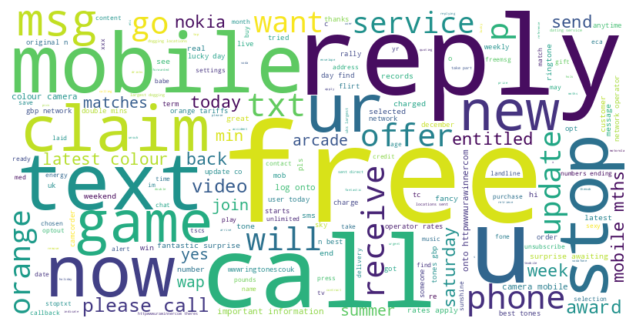

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800 , height = 400 , background_color = 'white').generate(spam)


plt.figure(figsize=(8,4))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis("off")
plt.show()

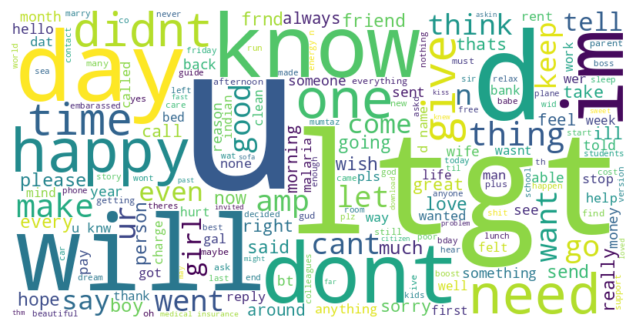

In [36]:
wordcloud = WordCloud(width=800 , height = 400 , background_color = 'white').generate(normal)


plt.figure(figsize=(8,4))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis("off")
plt.show()

PART 2

In [51]:
df3 = pd.read_csv('GYTS.csv')

In [52]:
df3

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Uttarakhand,Total,31.4,18.5,26.6,17.2,13.2,7.3,14.3,5.6,...,16.7,27.5,25.4,63.4,50.7,56.5,50.0,14.3,67.9,60.7
103,Uttarakhand,Urban,39.5,25.7,35.9,24.8,19.4,9.7,22.2,7.7,...,22.4,35.3,35.4,67.7,60.6,67.4,42.9,0.0,42.9,57.1
104,Uttarakhand,Rural,28.2,15.7,22.9,14.2,10.7,6.3,11.3,4.8,...,14.4,24.4,21.5,61.7,46.9,52.2,52.4,19.1,76.2,61.9
105,West Bengal,Total,17.3,7.1,9.3,5.2,5.4,3.6,5.5,2.9,...,21.0,25.1,19.9,73.7,48.1,49.3,94.3,65.7,85.7,91.4


In [53]:
df3 = df3[df3["Area"]=="Total"]
df3 = df3[df3["State/UT"]=="Gujarat"]
df3

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
36,Gujarat,Total,13.9,5.4,8.8,5.1,4.9,3.3,5.8,3.3,...,17.8,39.4,25.4,68.3,60.7,59.1,94.1,52.9,85.3,91.2


In [54]:
col = df3.columns

In [55]:
ps = []
for i in range(len(col)):
    if col[i].startswith("Exposure"):
        ps.append(df3[col[i]])

In [56]:
# values = []
# for i in ps:
#     values.append(df3[i])
#     print(df3[i])

In [57]:
kf =pd.DataFrame(ps)


kf

,36
Exposure to tobacco smoke at home/public place (%),29.8
Exposure to tobacco smoke at home (%),10.3
Exposure to tobacco smoke inside any enclosed public places (%),20.6
Exposure to tobacco smoke at any outdoor public places (%),22.2


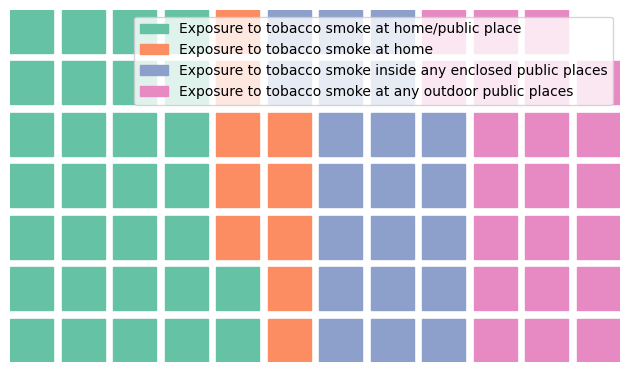

In [58]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
fig = plt.figure(FigureClass = Waffle , rows =7 , values = kf.iloc[:,-1] , labels = ["Exposure to tobacco smoke at home/public place" , "Exposure to tobacco smoke at home" , "Exposure to tobacco smoke inside any enclosed public places","Exposure to tobacco smoke at any outdoor public places"] )